Iteración 1, Error absoluto: 6.079437, Error relativo: 0.327694, Error cuadrático: 3.008644
Iteración 2, Error absoluto: 1.048182, Error relativo: 0.056499, Error cuadrático: 0.559399
Iteración 3, Error absoluto: 0.281881, Error relativo: 0.015194, Error cuadrático: 0.145679
Iteración 4, Error absoluto: 0.210472, Error relativo: 0.011345, Error cuadrático: 0.158083
Iteración 5, Error absoluto: 0.138323, Error relativo: 0.007456, Error cuadrático: 0.071482
Iteración 6, Error absoluto: 0.031024, Error relativo: 0.001672, Error cuadrático: 0.015960
Iteración 7, Error absoluto: 0.018561, Error relativo: 0.001000, Error cuadrático: 0.012874
Iteración 8, Error absoluto: 0.009115, Error relativo: 0.000491, Error cuadrático: 0.004726
Iteración 9, Error absoluto: 0.002362, Error relativo: 0.000127, Error cuadrático: 0.001101
Iteración 10, Error absoluto: 0.001625, Error relativo: 0.000088, Error cuadrático: 0.001217
Iteración 11, Error absoluto: 0.001253, Error relativo: 0.000068, Error cuadrát

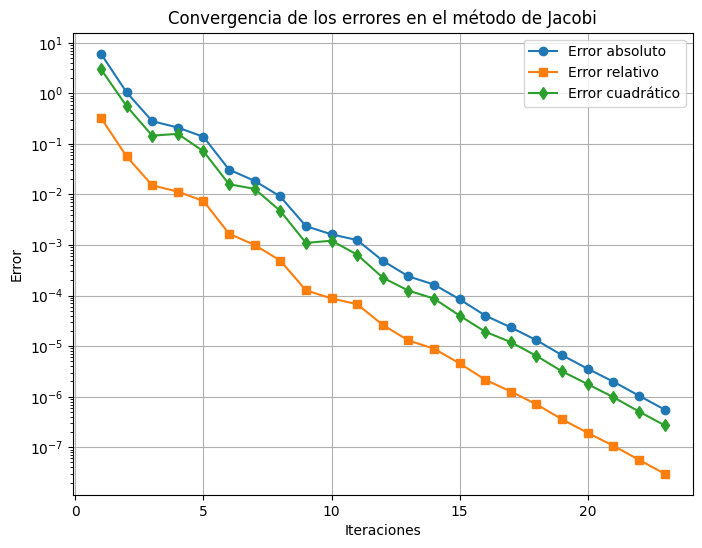

Solución aproximada: [ 1.41002268  4.55125309 -1.77448762 -8.47608165 -2.34031911]
Solución exacta: [ 1.41002278  4.55125285 -1.77448747 -8.476082   -2.34031891]


In [9]:
#   Codigo que implementa el esquema numerico
#   del metodo iterativo de Jacobi para
#   resolver sistemas de ecuaciones
#
#           Autor:
#   kimberly miranda rosel
#   kimberlymiranda080805@gmail.com
#   Version 2.0 : 11/03/2025
#   ejercicio 1

import numpy as np
import matplotlib.pyplot as plt

# Definir el sistema de ecuaciones del ejemplo
A = np.array([[10, -1, 2, 0, 0],
              [-1, 11, -1, 3, 0],
              [2, -1, 10, -1, 0],
              [-1, 3, 8, -2, 0],
              [0, 0, 2, -2, 10]])

b = np.array([6, 25, -11, 15, -10])

# Solución exacta para comparar errores
sol_exacta = np.linalg.solve(A, b)

# Criterio de paro
tolerancia = 1e-6
max_iter = 100

# Implementación del método de Jacobi
def jacobi(A, b, tol, max_iter):
    n = len(A)
    x = np.zeros(n)  # Aproximación inicial
    errores_abs = []
    errores_rel = []
    errores_cuad = []

    for k in range(max_iter):
        x_new = np.zeros(n)
        for i in range(n):
            suma = sum(A[i, j] * x[j] for j in range(n) if j != i)
            x_new[i] = (b[i] - suma) / A[i, i]

        # Calcular errores
        error_abs = np.linalg.norm(x_new - sol_exacta, ord=1)
        error_rel = np.linalg.norm(x_new - sol_exacta, ord=1) / np.linalg.norm(sol_exacta, ord=1)
        error_cuad = np.linalg.norm(x_new - sol_exacta, ord=2)

        errores_abs.append(error_abs)
        errores_rel.append(error_rel)
        errores_cuad.append(error_cuad)

        # Imprimir errores de la iteración
        print(f"Iteración {k+1}, Error absoluto: {error_abs:.6f}, Error relativo: {error_rel:.6f}, Error cuadrático: {error_cuad:.6f}")

        # Criterio de convergencia
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            break

        x = x_new

    return x, errores_abs, errores_rel, errores_cuad, k+1

# Ejecutar el método de Jacobi
sol_aprox, errores_abs, errores_rel, errores_cuad, iteraciones = jacobi(A, b, tolerancia, max_iter)

# Graficar los errores
plt.figure(figsize=(8,6))
plt.plot(range(1, iteraciones+1), errores_abs, label="Error absoluto", marker='o')
plt.plot(range(1, iteraciones+1), errores_rel, label="Error relativo", marker='s')
plt.plot(range(1, iteraciones+1), errores_cuad, label="Error cuadrático", marker='d')
plt.xlabel("Iteraciones")
plt.ylabel("Error")
plt.yscale("log")
plt.title("Convergencia de los errores en el método de Jacobi")
plt.legend()
plt.grid()
plt.savefig("errores_jacobi.png")  # Guardar la figura en archivo PNG
plt.show()

# Mostrar la solución aproximada
print(f"Solución aproximada: {sol_aprox}")
print(f"Solución exacta: {sol_exacta}")

Iteración 1, Error absoluto: 2.635876, Error relativo: 0.291900, Error cuadrático: 1.181051
Iteración 2, Error absoluto: 0.907719, Error relativo: 0.100522, Error cuadrático: 0.417221
Iteración 3, Error absoluto: 0.302451, Error relativo: 0.033494, Error cuadrático: 0.145011
Iteración 4, Error absoluto: 0.125026, Error relativo: 0.013846, Error cuadrático: 0.057698
Iteración 5, Error absoluto: 0.046137, Error relativo: 0.005109, Error cuadrático: 0.021155
Iteración 6, Error absoluto: 0.018422, Error relativo: 0.002040, Error cuadrático: 0.008424
Iteración 7, Error absoluto: 0.007043, Error relativo: 0.000780, Error cuadrático: 0.003228
Iteración 8, Error absoluto: 0.002757, Error relativo: 0.000305, Error cuadrático: 0.001259
Iteración 9, Error absoluto: 0.001064, Error relativo: 0.000118, Error cuadrático: 0.000487
Iteración 10, Error absoluto: 0.000415, Error relativo: 0.000046, Error cuadrático: 0.000190
Iteración 11, Error absoluto: 0.000161, Error relativo: 0.000018, Error cuadrát

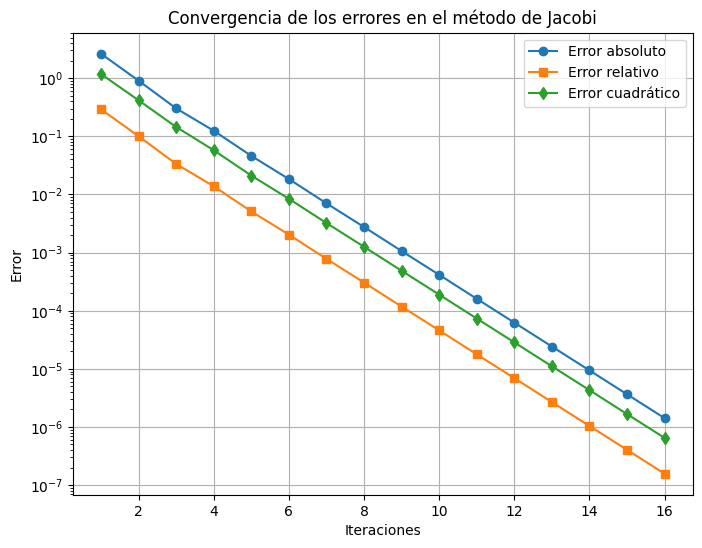

Solución aproximada: [ 1.66282605  0.93198273 -1.72219315  1.58740262 -1.35548245  1.77016342]
Solución exacta: [ 1.66282719  0.93198186 -1.72219376  1.58740299 -1.35548283  1.77016314]


In [7]:
#   Codigo que implementa el esquema numerico
#   del metodo iterativo de Jacobi para
#   resolver sistemas de ecuaciones
#
#           Autor:
#   kimberly miranda rosel
#   kimberlymiranda080805@gmail.com
#   Version 2.0 : 11/03/2025
#   ejercicio 2

import numpy as np
import matplotlib.pyplot as plt

# Definir el sistema de ecuaciones del ejemplo
A = np.array([[8, 2, 3, 0, 0, 0],
              [3, 15, -2, 1, 0, 0],
              [0, -2, 12, 2, -1, 0],
              [0, 1, -1, 9, 2, 1],
              [0, 0, -2, 3, 14, 1],
              [0 ,0 ,0, 1, -2, 10]])

b = np.array([10, 24, -18, 16, -9, 22])

# Solución exacta para comparar errores
sol_exacta = np.linalg.solve(A, b)

# Criterio de paro
tolerancia = 1e-6
max_iter = 100

# Implementación del método de Jacobi
def jacobi(A, b, tol, max_iter):
    n = len(A)
    x = np.zeros(n)  # Aproximación inicial
    errores_abs = []
    errores_rel = []
    errores_cuad = []

    for k in range(max_iter):
        x_new = np.zeros(n)
        for i in range(n):
            suma = sum(A[i, j] * x[j] for j in range(n) if j != i)
            x_new[i] = (b[i] - suma) / A[i, i]

        # Calcular errores
        error_abs = np.linalg.norm(x_new - sol_exacta, ord=1)
        error_rel = np.linalg.norm(x_new - sol_exacta, ord=1) / np.linalg.norm(sol_exacta, ord=1)
        error_cuad = np.linalg.norm(x_new - sol_exacta, ord=2)

        errores_abs.append(error_abs)
        errores_rel.append(error_rel)
        errores_cuad.append(error_cuad)

        # Imprimir errores de la iteración
        print(f"Iteración {k+1}, Error absoluto: {error_abs:.6f}, Error relativo: {error_rel:.6f}, Error cuadrático: {error_cuad:.6f}")

        # Criterio de convergencia
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            break

        x = x_new

    return x, errores_abs, errores_rel, errores_cuad, k+1

# Ejecutar el método de Jacobi
sol_aprox, errores_abs, errores_rel, errores_cuad, iteraciones = jacobi(A, b, tolerancia, max_iter)

# Graficar los errores
plt.figure(figsize=(8,6))
plt.plot(range(1, iteraciones+1), errores_abs, label="Error absoluto", marker='o')
plt.plot(range(1, iteraciones+1), errores_rel, label="Error relativo", marker='s')
plt.plot(range(1, iteraciones+1), errores_cuad, label="Error cuadrático", marker='d')
plt.xlabel("Iteraciones")
plt.ylabel("Error")
plt.yscale("log")
plt.title("Convergencia de los errores en el método de Jacobi")
plt.legend()
plt.grid()
plt.savefig("errores_jacobi.png")  # Guardar la figura en archivo PNG
plt.show()

# Mostrar la solución aproximada
print(f"Solución aproximada: {sol_aprox}")
print(f"Solución exacta: {sol_exacta}")

Iteración 1, Error absoluto , 5.117545, Error relativo , 0.263568, Error cuadrático , 2.587105
Iteración 2, Error absoluto , 4.631584, Error relativo , 0.238540, Error cuadrático , 3.364558
Iteración 3, Error absoluto , 1.352472, Error relativo , 0.069656, Error cuadrático , 0.783158
Iteración 4, Error absoluto , 0.881485, Error relativo , 0.045399, Error cuadrático , 0.619025
Iteración 5, Error absoluto , 0.314860, Error relativo , 0.016216, Error cuadrático , 0.211647
Iteración 6, Error absoluto , 0.155364, Error relativo , 0.008002, Error cuadrático , 0.110988
Iteración 7, Error absoluto , 0.068400, Error relativo , 0.003523, Error cuadrático , 0.050441
Iteración 8, Error absoluto , 0.029134, Error relativo , 0.001500, Error cuadrático , 0.021004
Iteración 9, Error absoluto , 0.014212, Error relativo , 0.000732, Error cuadrático , 0.010994
Iteración 10, Error absoluto , 0.005913, Error relativo , 0.000305, Error cuadrático , 0.004252
Iteración 11, Error absoluto , 0.002906, Error re

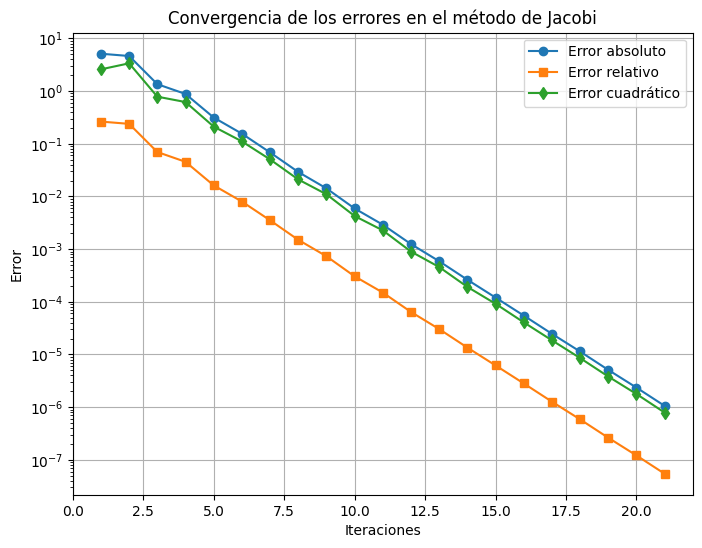

Solución aproximada: [ 2.05136268  2.20670325 -0.20294567  0.31082353  0.91999876 13.72458543
  0.        ]
Solución exacta: [ 2.05136268  2.20670323 -0.20294575  0.31082349  0.91999925 13.72458713
  0.        ]


In [1]:
#   Codigo que implementa el esquema numerico
#   del metodo iterativo de Jacobi para
#   resolver sistemas de ecuaciones
#
#           Autor:
#   kimberly miranda rosel
#   kimberlymiranda080805@gmail.com
#   Version 2.0 : 11/03/2025
#   ejercicio 3

import numpy as np
import matplotlib.pyplot as plt

# Definir el sistema de ecuaciones del ejemplo
A = np.array([[12, -2, 1, 0, 0, 0, 0],
              [-3, 18, -4, 2, 0, 0, 0],
              [1, -2, 16, -1, 1, 0, 0],
              [0, 2, -1, 11, -3, 1, 0],
              [0, 0, -2, 4, 15, -2, 1],
              [0, 0, 0, 1, -3, 2, 13],
              [0, 0, 0, 0, 0, 0, 10]])

b = np.array([20, 35, -5, 19, -12, 25, 0])

# Solución exacta para comparar errores
# Se añade esta linea para determinar
# una solución exacta para comparar errores
sol_exacta = np.linalg.solve(A, b)


# Criterio de paro
tolerancia = 1e-6
max_iter = 100

# Implementación del método de Jacobi
def jacobi(A, b, tol, max_iter):
    n = len(A)
    x = np.zeros(n)  # Aproximación inicial
    errores_abs = []
    errores_rel = []
    errores_cuad = []

    for k in range(max_iter):
        x_new = np.zeros(n)
        for i in range(n):
            suma = sum(A[i, j] * x[j] for j in range(n) if j != i)
            x_new[i] = (b[i] - suma) / A[i, i]

        # Calcular errores
        error_abs = np.linalg.norm(x_new - sol_exacta, ord=1) # norm sirve para calcular la norma de un vector
        error_rel = np.linalg.norm(x_new - sol_exacta, ord=1) / np.linalg.norm(sol_exacta, ord=1)
        error_cuad = np.linalg.norm(x_new - sol_exacta, ord=2)

        errores_abs.append(error_abs)
        errores_rel.append(error_rel)
        errores_cuad.append(error_cuad)

        # Imprimir errores de la iteración
        print(f"Iteración {k+1}, Error absoluto , {error_abs:.6f}, Error relativo , {error_rel:.6f}, Error cuadrático , {error_cuad:.6f}")

        # Criterio de convergencia
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            break

        x = x_new

    return x, errores_abs, errores_rel, errores_cuad, k+1

# Ejecutar el método de Jacobi
sol_aprox, errores_abs, errores_rel, errores_cuad, iteraciones = jacobi(A, b, tolerancia, max_iter)

# Graficar los errores
plt.figure(figsize=(8,6))
plt.plot(range(1, iteraciones+1), errores_abs, label="Error absoluto", marker='o')
plt.plot(range(1, iteraciones+1), errores_rel, label="Error relativo", marker='s')
plt.plot(range(1, iteraciones+1), errores_cuad, label="Error cuadrático", marker='d')
plt.xlabel("Iteraciones")
plt.ylabel("Error")
plt.yscale("log")
plt.title("Convergencia de los errores en el método de Jacobi")
plt.legend()
plt.grid()
plt.savefig("errores_jacobi.png")  # Guardar la figura en archivo PNG
plt.show()

# Mostrar la solución aproximada
print(f"Solución aproximada: {sol_aprox}")
print(f"Solución exacta: {sol_exacta}")
